In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set() ## this is commented out after the results_log.summary()is done to get the LR table
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Lets apply a fix to the statsmodels library

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [3]:
filepath =  r'C:\Users\hp\Downloads\Logistic regression dataset\breast_cancer.csv'
original_data = pd.read_csv(filepath)
original_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [4]:
dummy_data = original_data.copy()


dummy_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2
679,2,1,1,1,2,1,1,1,1,2
680,5,10,10,3,7,3,8,10,2,4
681,4,8,6,4,3,4,10,6,1,4


In [5]:
info = dummy_data.info()
desc = dummy_data.describe()
nully = dummy_data.isnull().any()
duplicates= dummy_data.duplicated()

info, desc, nully, duplicates

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              683 non-null    int64
 1   Uniformity of Cell Size      683 non-null    int64
 2   Uniformity of Cell Shape     683 non-null    int64
 3   Marginal Adhesion            683 non-null    int64
 4   Single Epithelial Cell Size  683 non-null    int64
 5   Bare Nuclei                  683 non-null    int64
 6   Bland Chromatin              683 non-null    int64
 7   Normal Nucleoli              683 non-null    int64
 8   Mitoses                      683 non-null    int64
 9   Class                        683 non-null    int64
dtypes: int64(10)
memory usage: 53.5 KB


(None,
        Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
 count       683.000000               683.000000                683.000000   
 mean          4.442167                 3.150805                  3.215227   
 std           2.820761                 3.065145                  2.988581   
 min           1.000000                 1.000000                  1.000000   
 25%           2.000000                 1.000000                  1.000000   
 50%           4.000000                 1.000000                  1.000000   
 75%           6.000000                 5.000000                  5.000000   
 max          10.000000                10.000000                 10.000000   
 
        Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
 count         683.000000                   683.000000   683.000000   
 mean            2.830161                     3.234261     3.544656   
 std             2.864562                     2.223085     3.643857   
 min 

<Figure size 800x800 with 0 Axes>

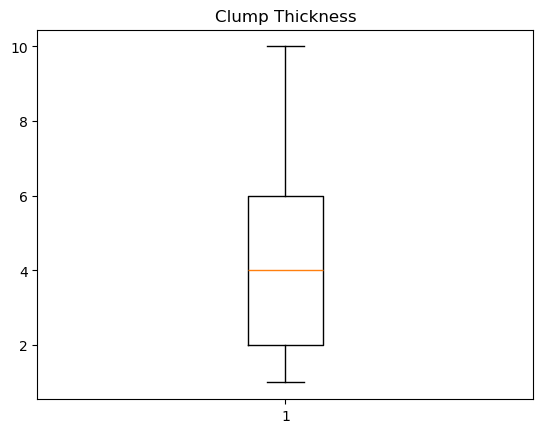

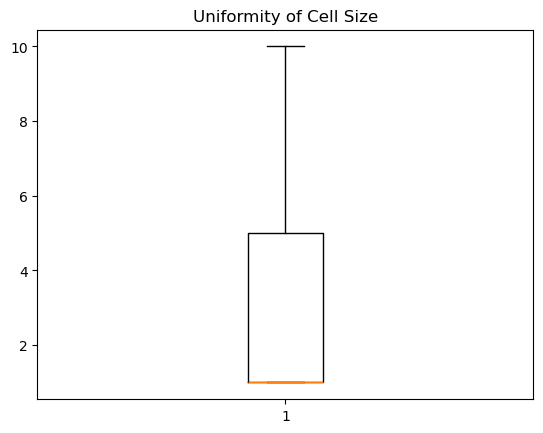

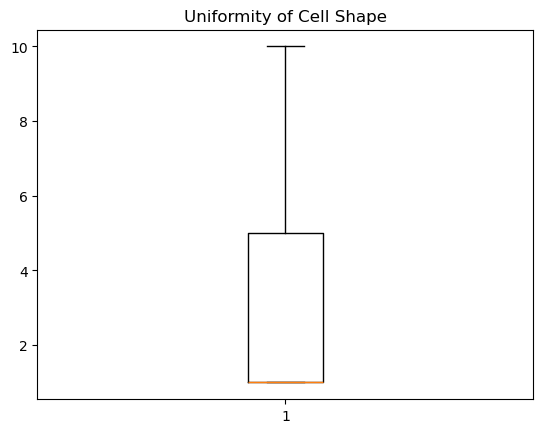

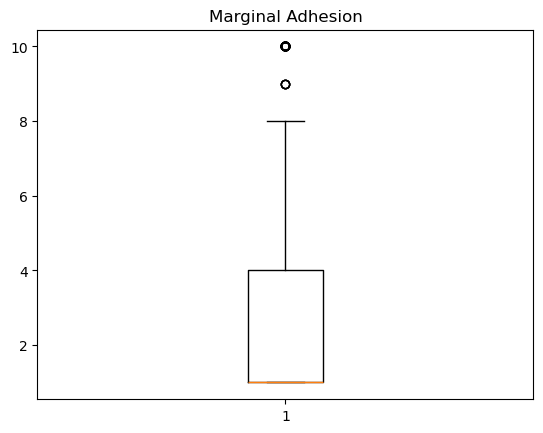

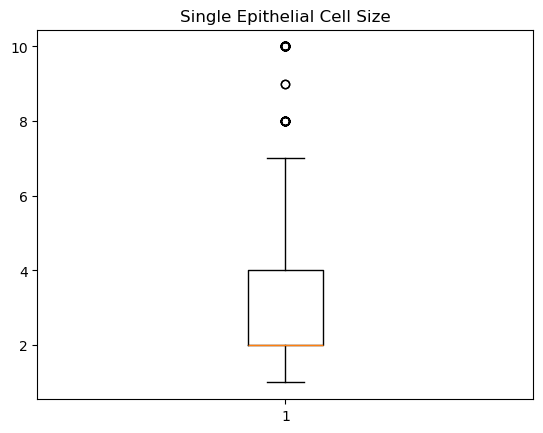

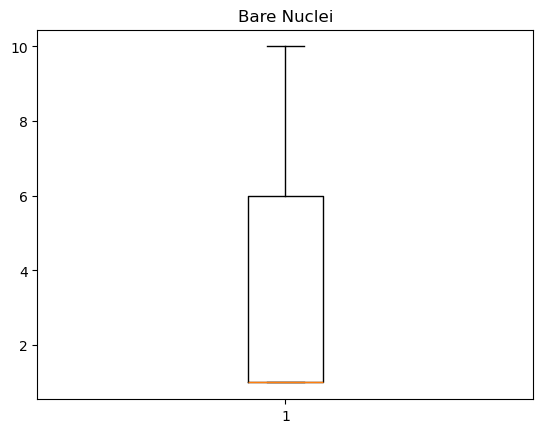

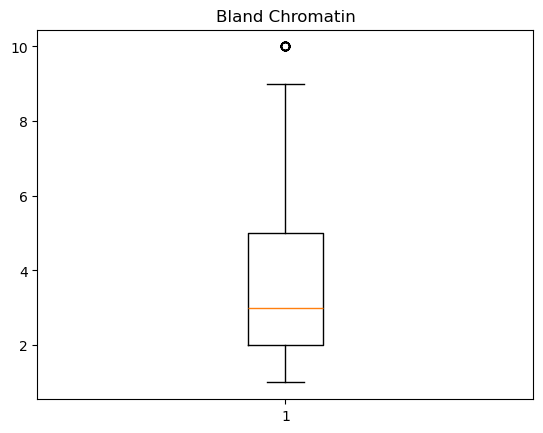

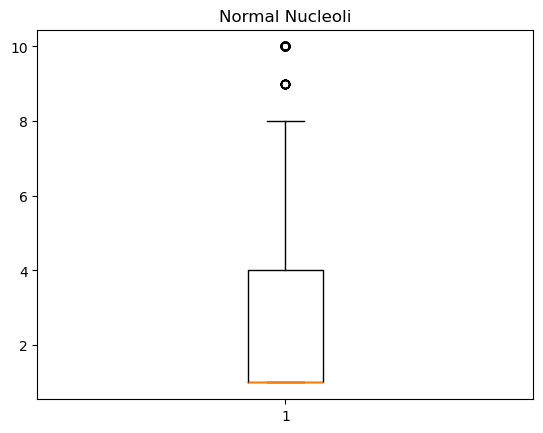

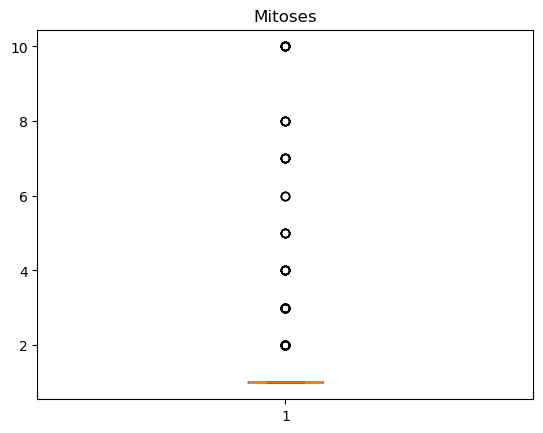

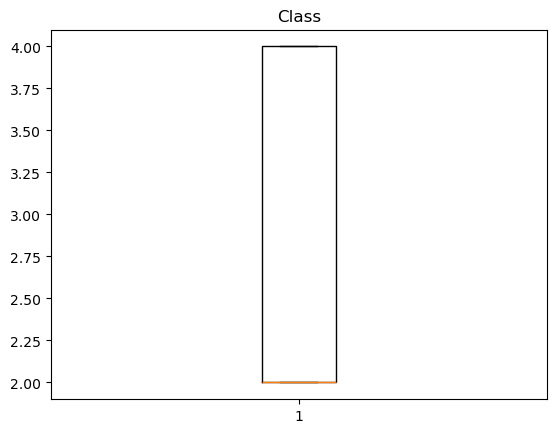

In [6]:
# looking for outliers in the dataset
plt.figure(figsize = (8, 8))
for i in dummy_data.columns:
    plt.figure()
    plt.boxplot(dummy_data[i])
    plt.title(i)
    plt.show()

In [7]:
dummy_data['Diagnosis'] = dummy_data['Class'].map( {2 :'Benign', 4 : 'Malignant'} )
dummy_data['Categorized Diagnosis'] = dummy_data['Class'].map({2 : 0, 4 : 1})
dummy_data

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Diagnosis,Categorized Diagnosis
0,5,1,1,1,2,1,3,1,1,2,Benign,0
1,5,4,4,5,7,10,3,2,1,2,Benign,0
2,3,1,1,1,2,2,3,1,1,2,Benign,0
3,6,8,8,1,3,4,3,7,1,2,Benign,0
4,4,1,1,3,2,1,3,1,1,2,Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...
678,3,1,1,1,3,2,1,1,1,2,Benign,0
679,2,1,1,1,2,1,1,1,1,2,Benign,0
680,5,10,10,3,7,3,8,10,2,4,Malignant,1
681,4,8,6,4,3,4,10,6,1,4,Malignant,1


In [8]:
#i want to take a look at the malignant data and analyse it
malignant_data = dummy_data[dummy_data['Diagnosis'] == 'Malignant']
malignant_data.head(70)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Diagnosis,Categorized Diagnosis
5,8,10,10,8,7,10,9,7,1,4,Malignant,1
12,5,3,3,3,2,3,4,4,1,4,Malignant,1
14,8,7,5,10,7,9,5,5,4,4,Malignant,1
15,7,4,6,4,6,1,4,3,1,4,Malignant,1
18,10,7,7,6,4,10,4,1,2,4,Malignant,1
...,...,...,...,...,...,...,...,...,...,...,...,...
148,10,10,8,6,4,5,8,10,1,4,Malignant,1
151,5,5,5,6,3,10,3,1,1,4,Malignant,1
154,9,9,10,3,6,10,7,10,6,4,Malignant,1
155,10,7,7,4,5,10,5,7,2,4,Malignant,1


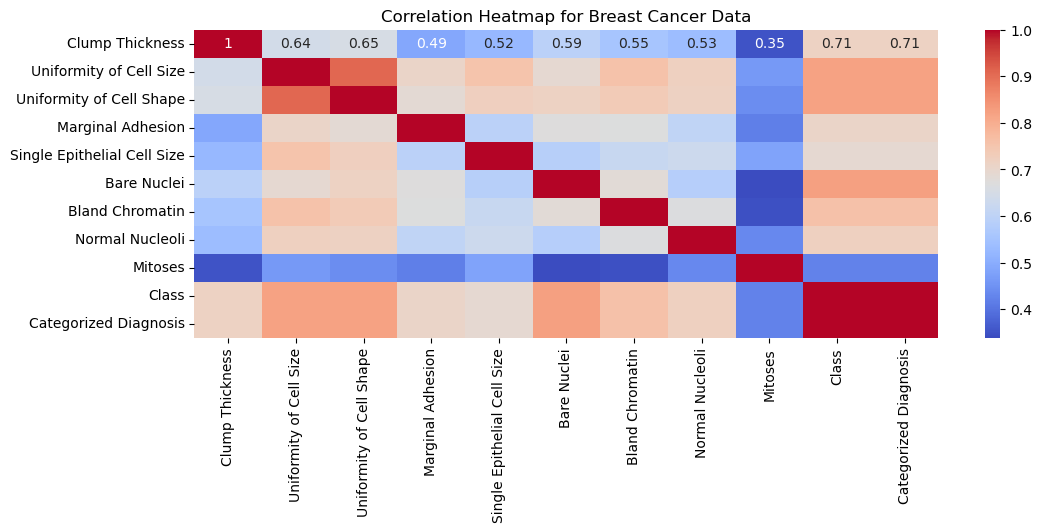

In [44]:
# checking for correlation
dummy_data2 = dummy_data.drop('Diagnosis', axis = 1)
plt.figure(figsize = (12,4))
sns.heatmap(dummy_data2.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlation Heatmap for Breast Cancer Data')
plt.show()

In [10]:
#dropping the class column
dummy_data3 = dummy_data2.drop('Class', axis = 1)
dummy_data3
dummy_data_class = dummy_data['Class']
dummy_data_class

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [11]:
#splitting the data for training

X_train, X_test, y_train, y_test = train_test_split(dummy_data3, dummy_data_class, test_size = 0.2, random_state = 42)

In [12]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#training the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
#result_model.summary()

LogisticRegression()

In [14]:
#Evaluating the model
y_predict = log_model.predict(X_test)

#calculating the accurcy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy: .2f}')


Accuracy:  1.00


In [15]:
#Checking the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_predict)
print('Confusion Matrix:')
print(confusion_matrix)

Confusion Matrix:
[[79  0]
 [ 0 58]]


In [16]:
#Classification report
class_report = classification_report(y_test, y_predict)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        58

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



The results you have provided are metrics from the evaluation of a classification model, typically used to assess its performance. Let's break down each component:

Accuracy:  1.00
Accuracy is the proportion of correctly predicted observations to the total observations. It is calculated as:

Accuracy = 𝑇𝑃 + 𝑇𝑁 / 𝑇𝑃 + 𝑇𝑁 + 𝐹𝑃 + 𝐹𝑁
where:

TP = True Positives
TN = True Negatives
FP = False Positives
FN = False Negatives
An accuracy of 1.00 means the model predicted every instance correctly, which indicates a perfect prediction on this dataset.

Confusion Matrix:
[[79  0]
 [ 0 58]]

The Confusion Matrix is a table used to describe the performance of a classification model on a set of test data for which the true values are known. In this matrix:

Row 1: True class 2 (79 instances predicted correctly as class 2, 0 instances predicted incorrectly as class 4)
Row 2: True class 4 (0 instances predicted incorrectly as class 2, 58 instances predicted correctly as class 4)
The matrix shows that all instances of both classes were correctly classified, with no misclassifications.

Classification Report:
plaintext
Copy code
Classification Report:
              precision    recall  f1-score   support

           2       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        58

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137

The Classification Report provides a detailed breakdown of precision, recall, and F1-score for each class:

Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is calculated as:

Precision = 𝑇𝑃/ 𝑇𝑃 + 𝐹𝑃
 
For both class 2 and class 4, the precision is 1.00, indicating no false positives.

Recall (or Sensitivity) is the ratio of correctly predicted positive observations to all the observations in the actual class. It is calculated as:

Recall = 𝑇𝑃/𝑇𝑃 + 𝐹𝑁
 
For both class 2 and class 4, the recall is 1.00, indicating no false negatives.

F1-score is the weighted average of Precision and Recall, and it is calculated as:

F1-score = 2 X Precision ⋅ Recall / Precision + Recall
 
For both class 2 and class 4, the F1-score is 1.00, indicating perfect precision and recall.

Support is the number of actual occurrences of the class in the dataset:

79 instances of class 2
58 instances of class 4
Macro avg is the unweighted average of the precision, recall, and F1-score for all classes.

Weighted avg is the average of the precision, recall, and F1-score, weighted by the number of true instances for each class.

In summary, these metrics show that the classification model performed perfectly on this dataset, correctly predicting all instances with no errors. 
This might indicate an overfit model if the dataset is not representative of a larger population.


TESTING TO SEE IF I CAN PINPOINT VARIABLES THAT ARE IMPORTANT

In [17]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
#checking the features importance
feature_importance_rf = rf_model.feature_importances_
rf_features = dummy_data3.columns

In [19]:
#Creating the dataframe for visualization
importance_df = pd.DataFrame({'Feature': rf_features, 'Importance' : feature_importance_rf})
importance_df = importance_df.sort_values(by = 'Importance', ascending = False)


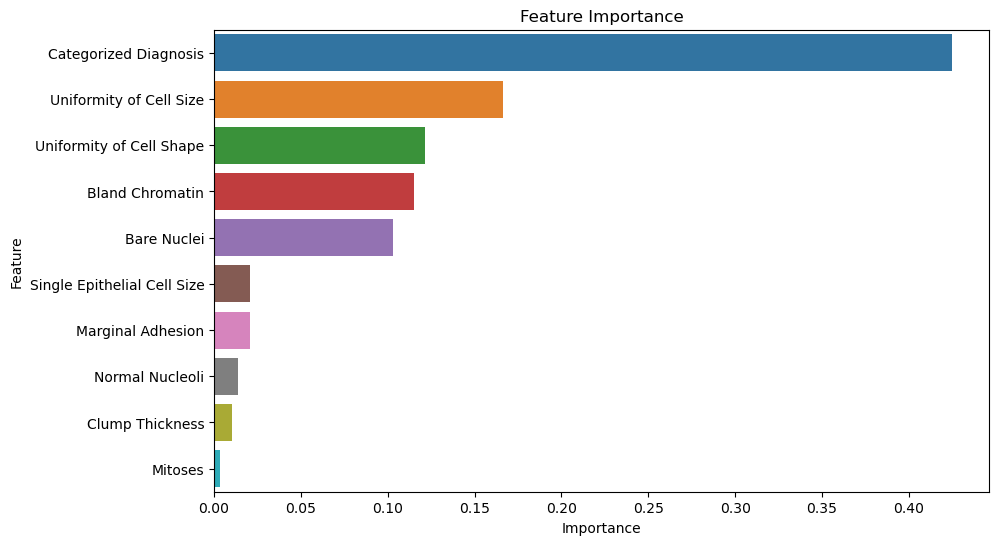

In [20]:
#Lets plot the importance
plt.figure(figsize = (10,6))
sns.barplot(x = 'Importance', y = 'Feature', data = importance_df)
plt.title('Feature Importance')
plt.show()

WORK ON A LOGISTIC REGRESSION TO CHECK UNIFORMITY CELL SIZE AND SHAPE 

In [21]:
y = dummy_data3['Categorized Diagnosis']
x1 = dummy_data3['Uniformity of Cell Size']

In [22]:
#Running regression on uniformity
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.186500
         Iterations 8


In [23]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Categorized Diagnosis   No. Observations:                  683
Model:                             Logit   Df Residuals:                      681
Method:                              MLE   Df Model:                            1
Date:                   Sat, 24 Aug 2024   Pseudo R-squ.:                  0.7119
Time:                           15:30:45   Log-Likelihood:                -127.38
converged:                          True   LL-Null:                       -442.18
Covariance Type:               nonrobust   LLR p-value:                6.136e-139
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -5.1745      0.388    -13.339      0.000      -5.935      -4.414
Uniformity of Cell Size     1.5980      0.133     11.974      0.000       1.336       1.860
===========================================================================================
"""

General Information
Dep. Variable: Categorized Diagnosis
This is the dependent variable (the outcome) that the model is predicting. It has been categorized, likely into binary values (e.g., 0 and 1).

No. Observations: 683
The number of observations (data points) used in the model.

Model: Logit
The type of model used is logistic regression (Logit).

Method: MLE
The method used to fit the model is Maximum Likelihood Estimation (MLE).

Date and Time:
The date and time when the model was run.

converged: True
Indicates that the optimization algorithm successfully converged to a solution.

Fit Statistics
Df Residuals: 681
Degrees of freedom of the residuals, calculated as the number of observations minus the number of parameters estimated (including the intercept).

Df Model: 1
Degrees of freedom for the model, indicating that one predictor variable was used.

Pseudo R-squ.: 0.7119
This is a measure similar to R-squared in linear regression, indicating the proportion of variance explained by the model. A value of 0.7119 suggests that the model explains about 71.19% of the variability in the dependent variable.

Log-Likelihood: -127.38
The value of the log-likelihood function at the estimated parameters. Higher (less negative) values indicate a better fit.

LL-Null: -442.18
The log-likelihood of the null model (a model with no predictors, only an intercept).

LLR p-value: 6.136e-139
The p-value for the likelihood ratio test comparing the fitted model to the null model. A very small p-value (close to 0) indicates that the model with predictors is significantly better than the null model.

Coefficients and Statistical Significance
coef:
The estimated coefficients for each predictor.

std err:
The standard error of the coefficient estimates.

z:
The z-value, which is the coefficient divided by its standard error.

P>|z|:
The p-value for the z-test, testing the null hypothesis that the coefficient is zero. A small p-value (typically < 0.05) indicates that the coefficient is significantly different from zero.

[0.025, 0.975]:
The 95% confidence interval for the coefficient estimates.

Coefficient Estimates
const: -5.1745
The intercept term. This is the log-odds of the outcome when all predictors are zero.

Uniformity of Cell Size: 1.5980
The coefficient for the predictor variable "Uniformity of Cell Size". This indicates the change in the log-odds of the outcome for a one-unit increase in "Uniformity of Cell Size". A positive coefficient (1.5980) suggests that as "Uniformity of Cell Size" increases, the log-odds of being categorized as the positive outcome (e.g., 'Malignant') increases.

Statistical Significance
const: p-value = 0.000
The intercept is highly significant (p < 0.05), indicating that it is significantly different from zero.

Uniformity of Cell Size: p-value = 0.000
This predictor is also highly significant, indicating that it has a significant effect on the outcome.

Interpretation
The model explains about 71.19% of the variability in the outcome (Pseudo R-squared = 0.7119).
Both the intercept and the predictor "Uniformity of Cell Size" are statistically significant.
An increase in "Uniformity of Cell Size" is associated with an increase in the log-odds of the outcome being positive (e.g., 'Malignant').
The model is significantly better than the null model, as indicated by the very small p-value for the likelihood ratio test.
Overall, the logistic regression model suggests that "Uniformity of Cell Size" is a significant predictor of the outcome "Categorized Diagnosis".

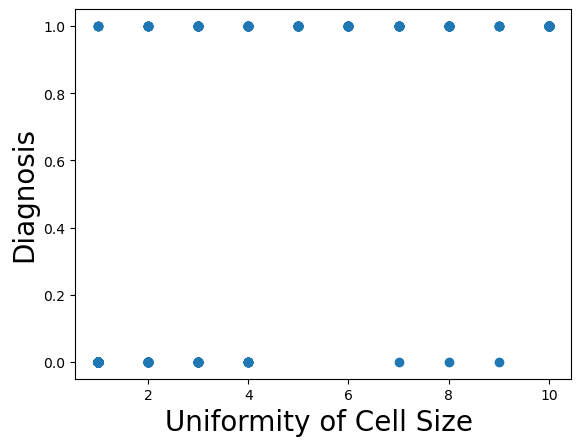

In [24]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,color = 'C0')
# Don't forget to label your axes!
plt.xlabel('Uniformity of Cell Size ', fontsize = 20)
plt.ylabel('Diagnosis', fontsize = 20)
plt.show()

In [25]:
#generating predicted probabilities
x_vals = np.linspace(x1.min(), x1.max(), 300)
x_vals_with_const = sm.add_constant(x_vals)
predicted_probs = results_log.predict(x_vals_with_const)


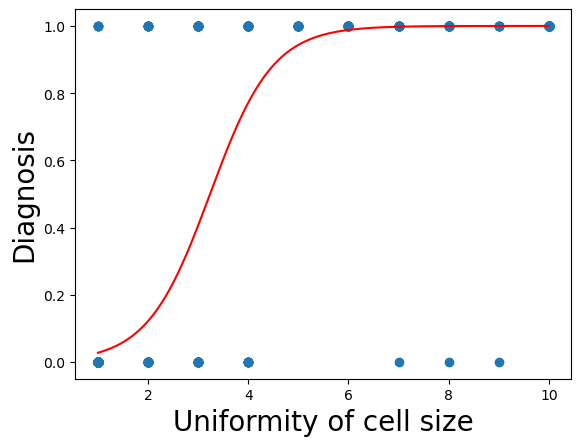

In [26]:
plt.scatter(x1, y, color='C0')
plt.plot(x_vals, predicted_probs, color='red')  # Add the logistic regression curve
plt.xlabel('Uniformity of cell size', fontsize=20)
plt.ylabel('Diagnosis', fontsize=20)
plt.show()


LOGISTIC REGRESSION TO CHECK BARE NUCLEI

In [27]:
y1 = dummy_data3['Categorized Diagnosis']
x2 = dummy_data3['Bare Nuclei']

In [28]:
#Running regression on uniformity
x = sm.add_constant(x2)
reg_log = sm.Logit(y1,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.249361
         Iterations 8


In [29]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Categorized Diagnosis   No. Observations:                  683
Model:                             Logit   Df Residuals:                      681
Method:                              MLE   Df Model:                            1
Date:                   Sat, 24 Aug 2024   Pseudo R-squ.:                  0.6148
Time:                           15:30:47   Log-Likelihood:                -170.31
converged:                          True   LL-Null:                       -442.18
Covariance Type:               nonrobust   LLR p-value:                2.922e-120
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.5222      0.232    -15.178      0.000      -3.977      -3.067
Bare Nuclei     0.8593      0.071     12.117      0.000       0.720       0.998
===============================================================================
"""


The results you've provided are from a logistic regression analysis. Here's an explanation of each component:

1. Model Overview
Dep. Variable (Dependent Variable): Categorized Diagnosis

This is the variable that the model is trying to predict. It's a binary variable, typically coded as 0 and 1, where 1 might represent a positive diagnosis (e.g., malignant) and 0 might represent a negative diagnosis (e.g., benign).
No. Observations: 683

The model was built using 683 observations (or rows) in the dataset.
Model: Logit

The model used is logistic regression (Logit), which is appropriate for binary classification tasks.
Method: MLE

The method used to estimate the coefficients is Maximum Likelihood Estimation (MLE), which is standard in logistic regression.
Df Residuals: 681

Degrees of freedom for residuals. Calculated as the number of observations minus the number of estimated parameters. Here, 
683 − 2 = 681
(since 2 parameters are estimated: the constant and the coefficient for Bare Nuclei).
Df Model: 1

Degrees of freedom for the model. Since only one independent variable (Bare Nuclei) is used, the degrees of freedom for the model is 1.

2. Fit Statistics
Pseudo R-squ.: 0.6148

This is the pseudo R-squared, which is a measure of model fit. Unlike the R-squared in linear regression, it doesn’t have a direct interpretation but indicates that the model is explaining about 61.48% of the variance in the dependent variable.

Log-Likelihood: -170.31

The log-likelihood of the model. This is a measure of how well the model fits the data, with higher (less negative) values indicating a better fit.

LL-Null: -442.18

The log-likelihood of a model with no predictors (only the intercept). This is used to compare the fit of the model with predictors against a null model.

LLR p-value: 2.922e-120

The p-value for the likelihood ratio test comparing the fitted model to the null model. A very small p-value (like this one) indicates that the model with predictors is significantly better than the null model.

3. Coefficient Estimates

const: -3.5222

The intercept term (constant). This is the log-odds of the dependent variable being 1 (e.g., a positive diagnosis) when all independent variables are 0. In this case, the log-odds are negative, suggesting that, in the absence of any other factors, the odds are against a positive diagnosis.

Bare Nuclei: 0.8593

This is the coefficient for the Bare Nuclei variable. It represents the change in the log-odds of the dependent variable being 1 for a one-unit increase in Bare Nuclei. Since this coefficient is positive, it suggests that higher values of Bare Nuclei are associated with higher odds of a positive diagnosis.

4. Standard Error (std err)
5. 
const (0.232) and Bare Nuclei (0.071)
These are the standard errors of the coefficients. They measure the average amount that the coefficient estimates vary from the actual average value of our response variable. Smaller values indicate more precise estimates.

7. z-value
const (-15.178) and Bare Nuclei (12.117)
The z-value is the coefficient divided by its standard error. It’s used to test the null hypothesis that the coefficient is equal to zero. Large absolute values of z suggest that the coefficient is significantly different from zero.

9. P>|z| (p-value)
const (0.000) and Bare Nuclei (0.000)
The p-value indicates the probability of obtaining a z-value as extreme as the one observed if the null hypothesis (that the coefficient is zero) is true. Very small p-values (typically < 0.05) suggest that the coefficient is statistically significant, which means it’s likely that the variable is an important predictor in the model.

11. Confidence Interval [0.025, 0.975]

const [-3.977, -3.067] and Bare Nuclei [0.720, 0.998]
These are the 95% confidence intervals for the coefficient estimates. They indicate that we are 95% confident that the true value of the coefficient lies within these intervals. Since the intervals for both the intercept and the Bare Nuclei coefficient do not include 0, this further confirms that these coefficients are statistically significant.

Summary:
The model shows that Bare Nuclei is a statistically significant predictor of the Categorized Diagnosis.
The positive coefficient for Bare Nuclei suggests that as the Bare Nuclei score increases, the odds of a positive diagnosis (e.g., malignant) increase.
The model appears to fit the data well, as indicated by the pseudo R-squared and other fit statistics.
This model could be used, for instance, to predict the likelihood of a malignancy based on the Bare Nuclei feature in the dataset.








In [30]:
#generating predicted probabilities
x_vals = np.linspace(x2.min(), x2.max(), 300)
x_vals_with_const = sm.add_constant(x_vals)
predicted_probs = results_log.predict(x_vals_with_const)


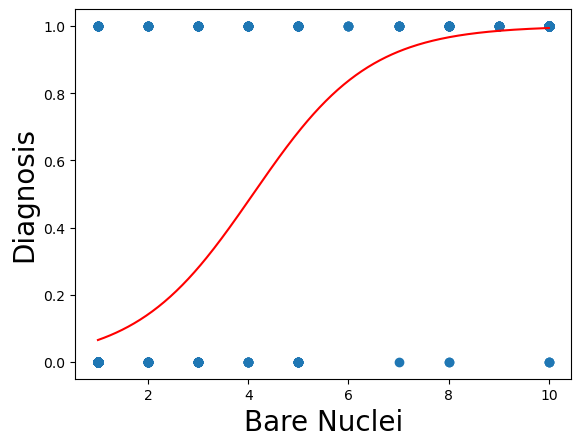

In [31]:
plt.scatter(x2, y1, color='C0')
plt.plot(x_vals, predicted_probs, color='red')  # Add the logistic regression curve
plt.xlabel('Bare Nuclei', fontsize=20)
plt.ylabel('Diagnosis', fontsize=20)
plt.show()

Logistic Regression to check  Single Epithelial Cell Size

In [32]:
y = dummy_data3['Categorized Diagnosis']
x1 = dummy_data3['Single Epithelial Cell Size']

In [33]:
#Running regression on uniformity
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.331536
         Iterations 8


In [34]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Categorized Diagnosis   No. Observations:                  683
Model:                             Logit   Df Residuals:                      681
Method:                              MLE   Df Model:                            1
Date:                   Sat, 24 Aug 2024   Pseudo R-squ.:                  0.4879
Time:                           15:30:51   Log-Likelihood:                -226.44
converged:                          True   LL-Null:                       -442.18
Covariance Type:               nonrobust   LLR p-value:                 7.772e-96
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -5.0432      0.350    -14.398      0.000      -5.730      -4.357
Single Epithelial Cell Size     1.4662      0.121     12.152      0.000       1.230       1.703
===============================================================================================
"""

The results you've provided are from another logistic regression analysis, focusing on the effect of Single Epithelial Cell Size on Categorized Diagnosis. Here's a detailed explanation of each component:

1. Model Overview
Dep. Variable (Dependent Variable): Categorized Diagnosis

This is the binary variable that the model is trying to predict. It could represent a condition such as a positive diagnosis (e.g., malignant) vs. a negative diagnosis (e.g., benign).

No. Observations: 683

The number of observations (data points) used in the model is 683.

Model: Logit

The logistic regression model (Logit) is used for binary classification.

Method: MLE

Maximum Likelihood Estimation (MLE) is used to estimate the model's coefficients.

Df Residuals: 681

Degrees of freedom for residuals. It's calculated as the number of observations minus the number of estimated parameters (here, 683 - 2 = 681).

Df Model: 1

Degrees of freedom for the model. Since there is only one independent variable (Single Epithelial Cell Size), the degrees of freedom for the model is 1.

2. Fit Statistics
   
Pseudo R-squ.: 0.4879

The pseudo R-squared indicates the proportion of variance in the dependent variable that is explained by the independent variable. A value of 0.4879 suggests that about 48.79% of the variability in the diagnosis can be explained by the Single Epithelial Cell Size.

Log-Likelihood: -226.44

The log-likelihood of the model. Higher values (closer to zero) indicate a better fit.

LL-Null: -442.18

The log-likelihood of a null model with only the intercept (no predictors). This is used to compare the fit of the model with predictors to the null model.

LLR p-value: 7.772e-96

This is the p-value from the likelihood ratio test comparing the fitted model to the null model. A very small p-value indicates that the model with the predictor (Single Epithelial Cell Size) is significantly better than the null model.

3. Coefficient Estimates
4. 
const: -5.0432

The intercept term. It represents the log-odds of the dependent variable being 1 (e.g., malignant) when all predictors are 0. A negative value indicates lower odds in the absence of other factors.

Single Epithelial Cell Size: 1.4662

This coefficient indicates that for every one-unit increase in Single Epithelial Cell Size, the log-odds of a positive diagnosis increase by 1.4662. A positive coefficient suggests a positive association between Single Epithelial Cell Size and the likelihood of a positive diagnosis.

4. Standard Error (std err)

const (0.350) and Single Epithelial Cell Size (0.121)

These values represent the standard errors of the coefficients. Smaller standard errors indicate more precise estimates of the coefficients.

7. z-value
   
const (-14.398) and Single Epithelial Cell Size (12.152)

The z-value is the coefficient divided by its standard error. It tests the null hypothesis that the coefficient is zero. Large absolute values indicate that the coefficients are significantly different from zero.

9. P>|z| (p-value)
    
const (0.000) and Single Epithelial Cell Size (0.000)
The p-value indicates the probability that the observed z-value occurred by chance if the null hypothesis is true. Both p-values are extremely small, meaning that the coefficients are statistically significant, and the corresponding variable is an important predictor.

11. Confidence Interval [0.025, 0.975]
    
const [-5.730, -4.357] and Single Epithelial Cell Size [1.230, 1.703]

These are the 95% confidence intervals for the coefficient estimates. The true value of the coefficient is likely to fall within these intervals with 95% confidence. The intervals do not include zero, which further indicates that the coefficients are statistically significant.

Summary:
The model suggests that Single Epithelial Cell Size is a significant predictor of Categorized Diagnosis.
The positive coefficient for Single Epithelial Cell Size implies that as this variable increases, the likelihood of a positive diagnosis (e.g., malignant) also increases.
The model's pseudo R-squared indicates a moderate fit, suggesting that while Single Epithelial Cell Size is an important factor, other factors may also contribute to the diagnosis.
This analysis could be useful in a medical context where Single Epithelial Cell Size is an important marker in determining the likelihood of a certain diagnosis, such as malignancy.

Logistic regression on Uniformity of Cell Shape

In [35]:
y = dummy_data3['Categorized Diagnosis']
x1 = dummy_data3['Uniformity of Cell Shape']

In [36]:
#Running regression on uniformity
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.195890
         Iterations 8


In [37]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Logit Regression Results                            
=================================================================================
Dep. Variable:     Categorized Diagnosis   No. Observations:                  683
Model:                             Logit   Df Residuals:                      681
Method:                              MLE   Df Model:                            1
Date:                   Sat, 24 Aug 2024   Pseudo R-squ.:                  0.6974
Time:                           15:30:54   Log-Likelihood:                -133.79
converged:                          True   LL-Null:                       -442.18
Covariance Type:               nonrobust   LLR p-value:                3.781e-136
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -5.1645      0.386    -13.363      0.000      -5.922      -4.407
Uniformity of Cell Shape     1.4727      0.120     12.223      0.000       1.237       1.709
============================================================================================
"""

These logistic regression results summarize the relationship between the predictor variable ("Uniformity of Cell Shape") and the dependent variable ("Categorized Diagnosis"). Let’s break down each part of the output:

General Model Information
Dep. Variable: Categorized Diagnosis: This is the dependent variable or the target variable the model is trying to predict. Here, it's "Categorized Diagnosis," which likely indicates whether a diagnosis is benign or malignant.

No. Observations: 683: The number of observations (rows) in the dataset used to fit the model. There are 683 data points.

Model: Logit: The type of model used is a logistic regression model, commonly used for binary classification tasks.

Df Residuals: 681: Degrees of freedom of the residuals, which is calculated as the number of observations minus the number of predictors minus 1 (683 - 1 - 1).

Method: MLE: The model was estimated using Maximum Likelihood Estimation (MLE), which is standard for logistic regression.

Df Model: 1: The number of predictors in the model. In this case, there is one predictor ("Uniformity of Cell Shape").

Pseudo R-squ.: 0.6974: This is a pseudo R-squared value, which provides an indication of the model's fit. Pseudo R-squared values do not have the same interpretation as R-squared in linear regression, but a value of 0.6974 suggests that the model explains a significant portion of the variance in the data.

Log-Likelihood: -133.79: This is the log-likelihood value of the fitted model. Higher (less negative) values indicate a better fit.

LL-Null: -442.18: This is the log-likelihood of a model with no predictors, only an intercept. This value serves as a baseline to compare with the log-likelihood of the fitted model.

LLR p-value: 3.781e-136: The p-value for the likelihood ratio test, which compares the fitted model with the null model (intercept-only). A very low p-value (near zero) suggests that the model with the predictor ("Uniformity of Cell Shape") significantly improves the fit over the null model.

Coefficients and Statistical Significance
const (Intercept)

coef: -5.1645: The intercept term in the logistic regression equation. It represents the log-odds of the outcome (Categorized Diagnosis) when "Uniformity of Cell Shape" is zero.
std err: 0.386: The standard error of the intercept coefficient.
z: -13.363: The z-value (coefficient divided by standard error), used to test if the coefficient is significantly different from zero.
P>|z|: 0.000: The p-value for the intercept term. A p-value of 0.000 indicates that the intercept is statistically significant.
[0.025, 0.975]: [-5.922, -4.407]: The 95% confidence interval for the intercept coefficient. It suggests that we are 95% confident that the true value of the intercept lies between -5.922 and -4.407.
Uniformity of Cell Shape

coef: 1.4727: The coefficient for "Uniformity of Cell Shape." This value represents the change in the log-odds of the outcome for a one-unit increase in "Uniformity of Cell Shape."
std err: 0.120: The standard error of the coefficient.
z: 12.223: The z-value for the coefficient. A large z-value indicates that the coefficient is significantly different from zero.
P>|z|: 0.000: The p-value for the coefficient, indicating that "Uniformity of Cell Shape" is a statistically significant predictor of "Categorized Diagnosis."
[0.025, 0.975]: [1.237, 1.709]: The 95% confidence interval for the coefficient. It suggests that the true value of the coefficient lies between 1.237 and 1.709 with 95% confidence.
Interpretation
Intercept: The intercept of -5.1645 means that when "Uniformity of Cell Shape" is zero, the log-odds of the diagnosis being categorized as malignant (or whatever the positive class is) are very low. This is mostly a baseline term.

Uniformity of Cell Shape: The coefficient of 1.4727 indicates that for each one-unit increase in "Uniformity of Cell Shape," the log-odds of having a positive diagnosis (likely malignant) increase by 1.4727. Since the p-value is very small (0.000), this predictor is statistically significant. In simpler terms, higher "Uniformity of Cell Shape" is strongly associated with a higher probability of a positive diagnosis.

Overall, the model suggests that "Uniformity of Cell Shape" is a strong and statistically significant predictor of the "Categorized Diagnosis." The relatively high pseudo R-squared value of 0.6974 also indicates a good model fit.






These logistic regression results summarize the relationship between the predictor variable ("Uniformity of Cell Shape") and the dependent variable ("Categorized Diagnosis"). Let’s break down each part of the output:

General Model Information
Dep. Variable: Categorized Diagnosis: This is the dependent variable or the target variable the model is trying to predict. Here, it's "Categorized Diagnosis," which likely indicates whether a diagnosis is benign or malignant.

No. Observations: 683: The number of observations (rows) in the dataset used to fit the model. There are 683 data points.

Model: Logit: The type of model used is a logistic regression model, commonly used for binary classification tasks.

Df Residuals: 681: Degrees of freedom of the residuals, which is calculated as the number of observations minus the number of predictors minus 1 (683 - 1 - 1).

Method: MLE: The model was estimated using Maximum Likelihood Estimation (MLE), which is standard for logistic regression.

Df Model: 1: The number of predictors in the model. In this case, there is one predictor ("Uniformity of Cell Shape").

Pseudo R-squ.: 0.6974: This is a pseudo R-squared value, which provides an indication of the model's fit. Pseudo R-squared values do not have the same interpretation as R-squared in linear regression, but a value of 0.6974 suggests that the model explains a significant portion of the variance in the data.

Log-Likelihood: -133.79: This is the log-likelihood value of the fitted model. Higher (less negative) values indicate a better fit.

LL-Null: -442.18: This is the log-likelihood of a model with no predictors, only an intercept. This value serves as a baseline to compare with the log-likelihood of the fitted model.

LLR p-value: 3.781e-136: The p-value for the likelihood ratio test, which compares the fitted model with the null model (intercept-only). A very low p-value (near zero) suggests that the model with the predictor ("Uniformity of Cell Shape") significantly improves the fit over the null model.

Coefficients and Statistical Significance
const (Intercept)

coef: -5.1645: The intercept term in the logistic regression equation. It represents the log-odds of the outcome (Categorized Diagnosis) when "Uniformity of Cell Shape" is zero.
std err: 0.386: The standard error of the intercept coefficient.
z: -13.363: The z-value (coefficient divided by standard error), used to test if the coefficient is significantly different from zero.
P>|z|: 0.000: The p-value for the intercept term. A p-value of 0.000 indicates that the intercept is statistically significant.
[0.025, 0.975]: [-5.922, -4.407]: The 95% confidence interval for the intercept coefficient. It suggests that we are 95% confident that the true value of the intercept lies between -5.922 and -4.407.
Uniformity of Cell Shape

coef: 1.4727: The coefficient for "Uniformity of Cell Shape." This value represents the change in the log-odds of the outcome for a one-unit increase in "Uniformity of Cell Shape."
std err: 0.120: The standard error of the coefficient.
z: 12.223: The z-value for the coefficient. A large z-value indicates that the coefficient is significantly different from zero.
P>|z|: 0.000: The p-value for the coefficient, indicating that "Uniformity of Cell Shape" is a statistically significant predictor of "Categorized Diagnosis."
[0.025, 0.975]: [1.237, 1.709]: The 95% confidence interval for the coefficient. It suggests that the true value of the coefficient lies between 1.237 and 1.709 with 95% confidence.
Interpretation
Intercept: The intercept of -5.1645 means that when "Uniformity of Cell Shape" is zero, the log-odds of the diagnosis being categorized as malignant (or whatever the positive class is) are very low. This is mostly a baseline term.

Uniformity of Cell Shape: The coefficient of 1.4727 indicates that for each one-unit increase in "Uniformity of Cell Shape," the log-odds of having a positive diagnosis (likely malignant) increase by 1.4727. Since the p-value is very small (0.000), this predictor is statistically significant. In simpler terms, higher "Uniformity of Cell Shape" is strongly associated with a higher probability of a positive diagnosis.

Overall, the model suggests that "Uniformity of Cell Shape" is a strong and statistically significant predictor of the "Categorized Diagnosis." The relatively high pseudo R-squared value of 0.6974 also indicates a good model fit.








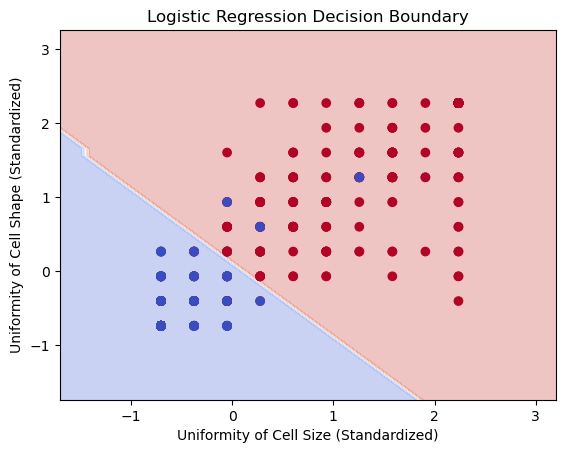

In [38]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.linear_model import LogisticRegression
#from sklearn.preprocessing import StandardScaler

# Ensure x1 is properly defined as a DataFrame with two columns
x1 = dummy_data3[['Uniformity of Cell Size', 'Uniformity of Cell Shape']]

# Standardize the data
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)

# Fit the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x1_scaled, y)

# Create a meshgrid for plotting decision boundary
x_min, x_max = x1_scaled[:, 0].min() - 1, x1_scaled[:, 0].max() + 1
y_min, y_max = x1_scaled[:, 1].min() - 1, x1_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for each point in the meshgrid
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(x1_scaled[:, 0], x1_scaled[:, 1], c=y, cmap='coolwarm')
plt.xlabel('Uniformity of Cell Size (Standardized)')
plt.ylabel('Uniformity of Cell Shape (Standardized)')
plt.title('Logistic Regression Decision Boundary')
plt.show()
